# SI 618 - Homework #1: Data Manipulation

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

** You should also feel free to ask questions on the class Slack channel! **

A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## 0. Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
- https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities (note: we suggest you use the [read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function to load the data into a DataFrame.

In [2]:
MY_UNIQNAME = 'tengdann' # please fill in your uniqname

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

In [15]:
import pandas as pd
%matplotlib inline

# Above libraries imported as per https://johnricco.github.io/2017/04/04/python-html/ to parse merged cells in html tables.

athletes = pd.read_csv('data/hw1_data/athlete_events.csv', index_col = None)
athletes.shape

(271116, 15)

The athletes DataFrame has 271,116 rows and 15 columns

In [4]:
regions = pd.read_csv('data/hw1_data/noc_regions.csv', index_col = None)
regions.shape

(230, 3)

The regions DataFrame has 230 rows and 3 columns

### 5 pt: What is the overall ratio of female to male atheletes? 
There are multiple ways one could determine the meaning of "overall" here, and there isn't necessarily one correct answer. Based on your interpretation, give a justification for the choices you made in your analysis.

In [5]:
len(athletes[athletes['Sex'] == 'F']) / len(athletes[athletes['Sex'] == 'M'])

0.37906548521318045

The overall ratio of females to males is 0.379.

### 10 pt: Which athelete competed in most number of events? 
In which events did the athelete participate, and for what range of years? Which country did the athlete represent?

In [6]:
athletes.Name.describe()

count                   271116
unique                  134732
top       Robert Tait McKenzie
freq                        58
Name: Name, dtype: object

In [7]:
tait = athletes[athletes.Name == 'Robert Tait McKenzie']
tait.Event.unique().tolist()

['Art Competitions Mixed Sculpturing',
 'Art Competitions Mixed Sculpturing, Statues',
 'Art Competitions Mixed Sculpturing, Medals And Reliefs',
 'Art Competitions Mixed Sculpturing, Unknown Event',
 'Art Competitions Mixed Sculpturing, Medals']

In [8]:
tait.Year.unique().tolist()

[1912, 1928, 1932, 1936, 1948]

In [9]:
tait.Team.unique().tolist()

['Canada']

The athlete who competed the most is Robert Tait McKenzie.  
He participated in:  
    1. Art Competitions Mixed Sculpturing  
    2. Art Competitions Mixed Sculpturing, Statues  
    3. Art Competitions Mixed Sculpturing, Medals and Reliefs  
    4. Art Competitions Mixed Sculpturing, Unknown Event  
    5. Art Competitions Mixed Sculpturing, Medals  
He competed from 1912 to 1948, representing Canada

### 10 pt: Which sport has the highest median athlete age? 
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

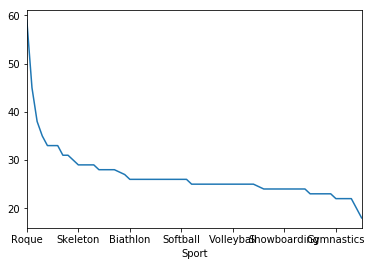

In [10]:
athletes.groupby('Sport').Age.median().sort_values(ascending = False).plot()

Roque has the highest median athlete age.

### 10 pt: In which events has the Netherlands won the most medals?

In [11]:
netherlands = athletes[athletes.Team == 'Netherlands']
ned_medals = netherlands[pd.notnull(netherlands.Medal)]
ned_medals.groupby('Event').Medal.count().sort_values().tail(5)

Event
Football Men's Football                             41
Rowing Women's Coxed Eights                         45
Swimming Women's 4 x 100 metres Freestyle Relay     55
Hockey Men's Hockey                                127
Hockey Women's Hockey                              128
Name: Medal, dtype: int64

The Netherlands has won the most medals in Women's Hockey.

### 10 pt: Which countries have more female medalists than male medalists?

In [12]:
medalists = athletes[pd.notnull(athletes.Medal)].groupby('NOC').Sex.describe()
medalists.loc[medalists['top'] == 'F']

,count,unique,top,freq
NOC,,,,
BLR,139,2,F,77
BRN,3,1,F,3
CHN,989,2,F,654
CRC,4,1,F,4
JAM,157,2,F,86
KOS,1,1,F,1
LIE,9,2,F,5
MNE,14,1,F,14
MOZ,2,1,F,2


Burundi, Belarus, Bahrain, China, Costa Rica, Hong Kong (China), Jamaica, Kosovo, Liechtenstein, Montenegro, Mozambique, Peru, North Korea, Romania, Singapore, Sri Lanka, Ukraine, and Zimbabwe all have more female medalists than male medalists.

I also included conties that only have female athletes; inherently any positive integer is greater than 0. Since some countries technically sent 0 male athletes, they would fulfill the conditionn laid out by the question.

### 10 pt: Which country won the most medal points in each of the 2016 Summer Olympics?
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [13]:
def points(row):
    if row['Medal'] == 'Gold':
        val = 3
    elif row['Medal'] == 'Silver':
        val = 2
    elif row['Medal'] == 'Bronze':
        val = 1 
    else:
        val = 0
    return val

athletes['Medal_val'] = athletes.apply(points, axis = 1)
athletes[athletes.Games == '2016 Summer'].groupby('Team').Medal_val.sum().sort_values(ascending = False).head(5)

Team
United States    582
Great Britain    328
Germany          294
Russia           241
China            227
Name: Medal_val, dtype: int64

The United States won the most medal points in 2016 Summer Olympics.

### 20 pt: For each year in which games were held, what proportion of gold medals did the host country win? 
You will need to combine multiple datasets to complete the analysis.  

In [26]:
link = 'https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities'
host_cities = pd.read_html(link)[1] # God bless pandas 0.24.0
host_cities.head(20)

,City,Country,Continent,Summer (Olympiad),Winter,Summer (Youth),Winter (Youth),Year,Opening Ceremony,Closing Ceremony
0,Athens,Greece,Europe,NaN,NaN,NaN,NaN,1896,April 6,April 15
1,Paris,France,Europe,NaN,NaN,NaN,NaN,1900,May 14,October 28
2,St. Louis[a],United States,North America,NaN,NaN,NaN,NaN,1904,July 1,November 23
3,London[c],United Kingdom,Europe,NaN,NaN,NaN,NaN,1908,April 27,October 31
4,Stockholm,Sweden,Europe,NaN,NaN,NaN,NaN,1912,May 5,July 22
5,Berlin,Germany,Europe,NaN,NaN,NaN,NaN,1916,Cancelled due to WWI[10],Cancelled due to WWI[10]
6,Antwerp[d],Belgium,Europe,NaN,NaN,NaN,NaN,1920,April 20,September 12[11]
7,Chamonix,France,Europe,NaN,NaN,NaN,NaN,1924,January 25,February 5[12]
8,Paris,France,Europe,NaN,NaN,NaN,NaN,1924,May 4,July 27[13]
9,St. Moritz,Switzerland,Europe,NaN,NaN,NaN,NaN,1928,February 11,February 19[14]


In [56]:
athletes_copy = athletes.copy()
ath_copy_reg = pd.merge(athletes_copy[['ID', 'Team', 'NOC', 'Year', 'Season', 'City', 'Medal']], regions[['NOC', 'region']], on = "NOC")
ath_copy_reg_wiki = pd.merge(ath_copy_reg, host_cities[['City', 'Country', 'Year']], on = ['City', 'Year'])
ath_copy_reg_wiki[ath_copy_reg_wiki.Medal == 'Gold'].groupby('Year').head()

,ID,Team,NOC,Year,Season,City,Medal,region,Country
18,20324,China,CHN,1992,Summer,Barcelona,Gold,China,Spain
27,27576,China,CHN,1992,Summer,Barcelona,Gold,China,Spain
28,27576,China-2,CHN,1992,Summer,Barcelona,Gold,China,Spain
35,37398,China,CHN,1992,Summer,Barcelona,Gold,China,Spain
43,38416,China,CHN,1992,Summer,Barcelona,Gold,China,Spain
12943,17299,China-1,CHN,2012,Summer,London,Gold,China,United Kingdom
12946,18005,China,CHN,2012,Summer,London,Gold,China,United Kingdom
12951,20182,China,CHN,2012,Summer,London,Gold,China,United Kingdom
12960,20258,China,CHN,2012,Summer,London,Gold,China,United Kingdom
12961,20258,China,CHN,2012,Summer,London,Gold,China,United Kingdom


(Use this space to explain your answers)

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas